# 

# Name : Asad ullah
# Batch : DS2312
# 

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Datset


In [60]:
df=pd.read_csv('winequality-red.csv')

In [61]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

The dataset contains the details of wines in which only numerical data present. Here quality is the target variable which contains 0-10

In [62]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

# Exploratory Data Analysis

In [63]:
df.shape

(1599, 12)

Dataset contains 1599 rows and 12 columns

In [64]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [66]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [67]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there is no null values in dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

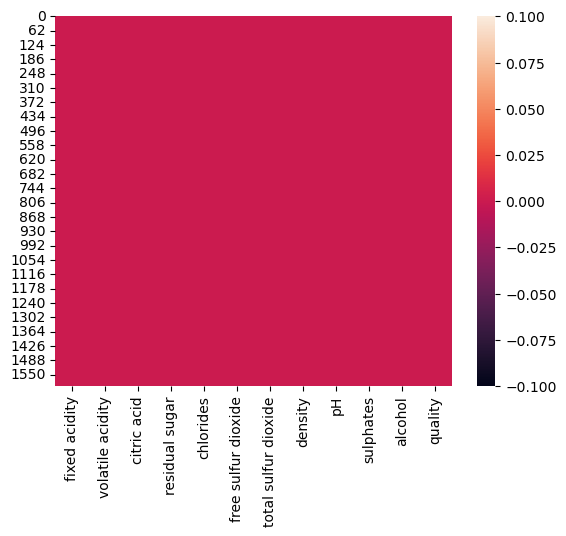

In [69]:
#Visualize by heatmap
sns.heatmap(df.isnull())

In [70]:
#Checking the values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

In [71]:
#Checking number of unique values in each column
df.nunique().to_frame("No of unique Values")

No of unique Values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

In [72]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Description of Dataset

In [73]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Univariate Analysis**

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


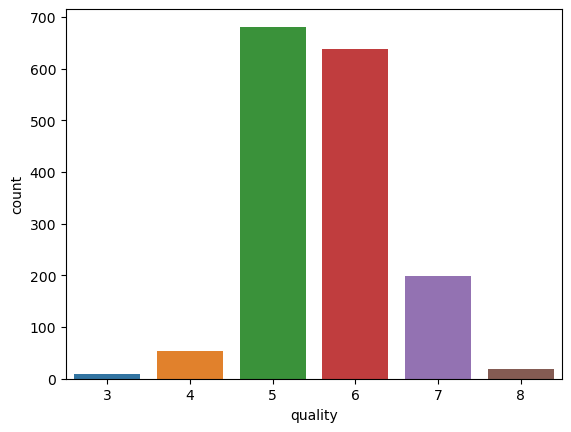

In [109]:
ax= sns.countplot(x='quality', data=df)
print(df['quality'].value_counts())

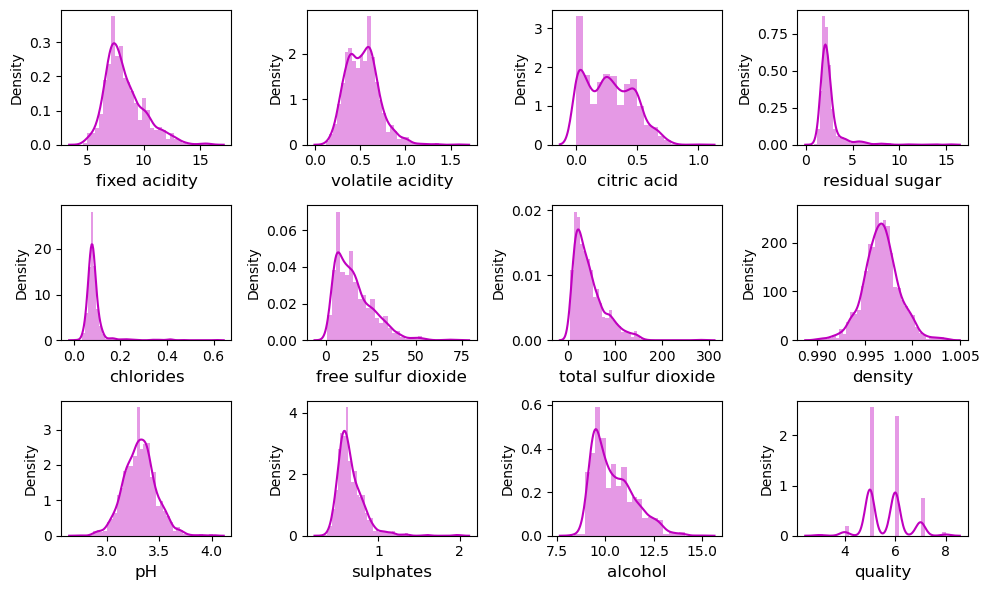

In [77]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6))
plotnumber=1

for col in df.columns:
    if plotnumber<=12:
        ax= plt.subplot(3,4, plotnumber)
        sns.distplot(df[col], color='m' )
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()



**BiVariate Analysis**

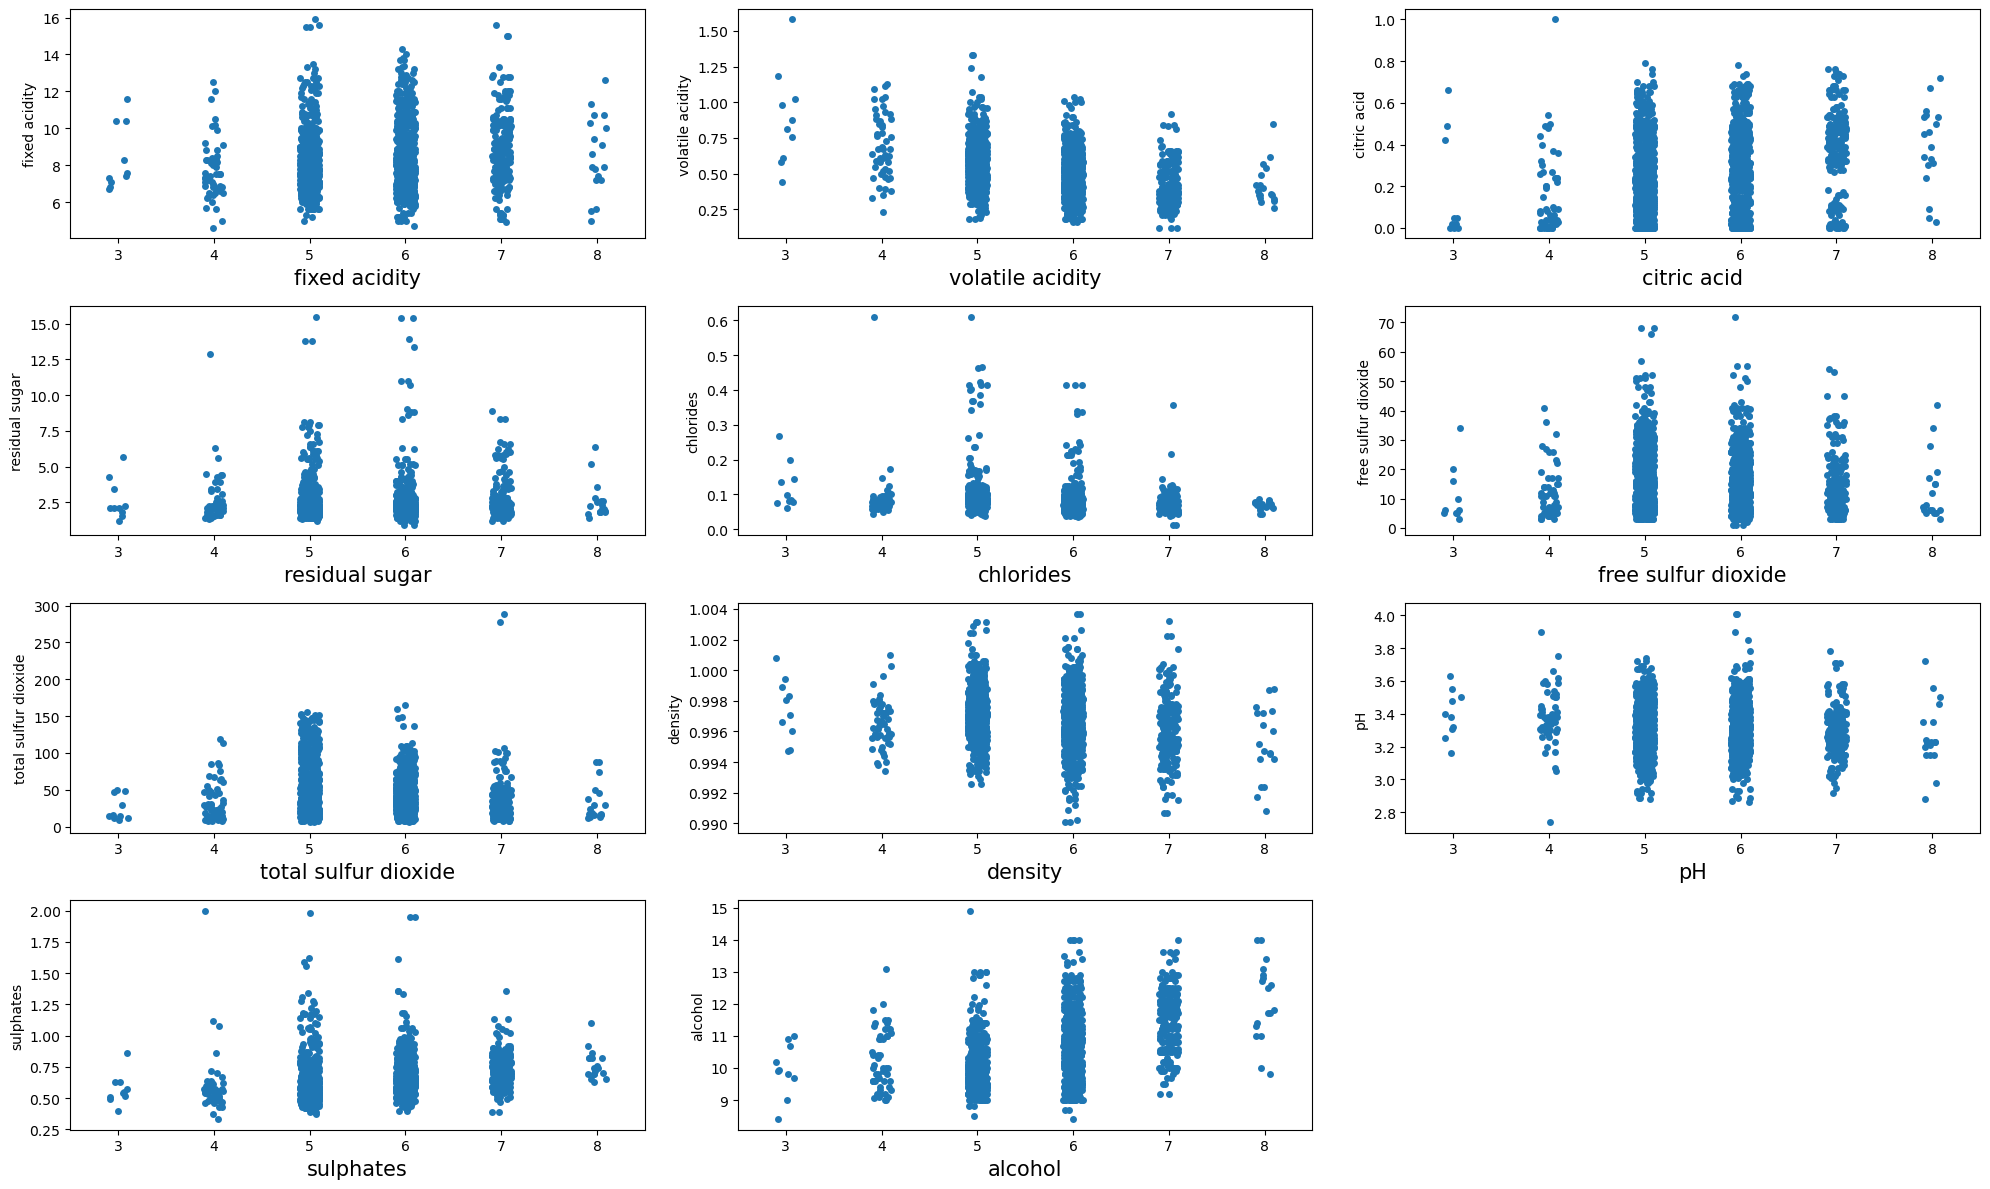

In [110]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.stripplot(x='quality', y= df[col],data=df)
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we can see most of them belongs to 5,6,7 and 8

In [112]:
df['class']=[1 if x >= 7 else 0 for x in df['quality']]
df['class'].value_counts()

class
0    1382
1     217
Name: count, dtype: int64

class
0    1382
1     217
Name: count, dtype: int64


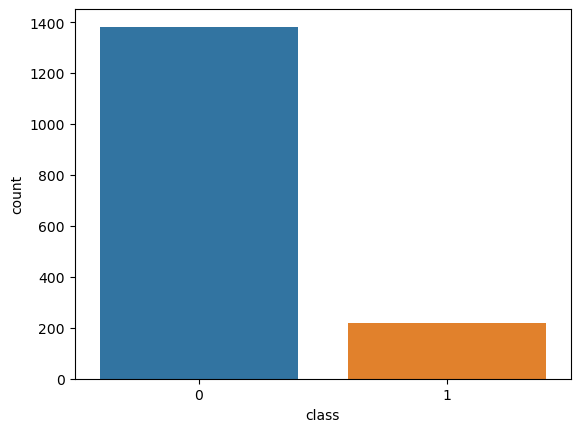

In [113]:
ax= sns.countplot(x='class', data=df)
print(df['class'].value_counts())

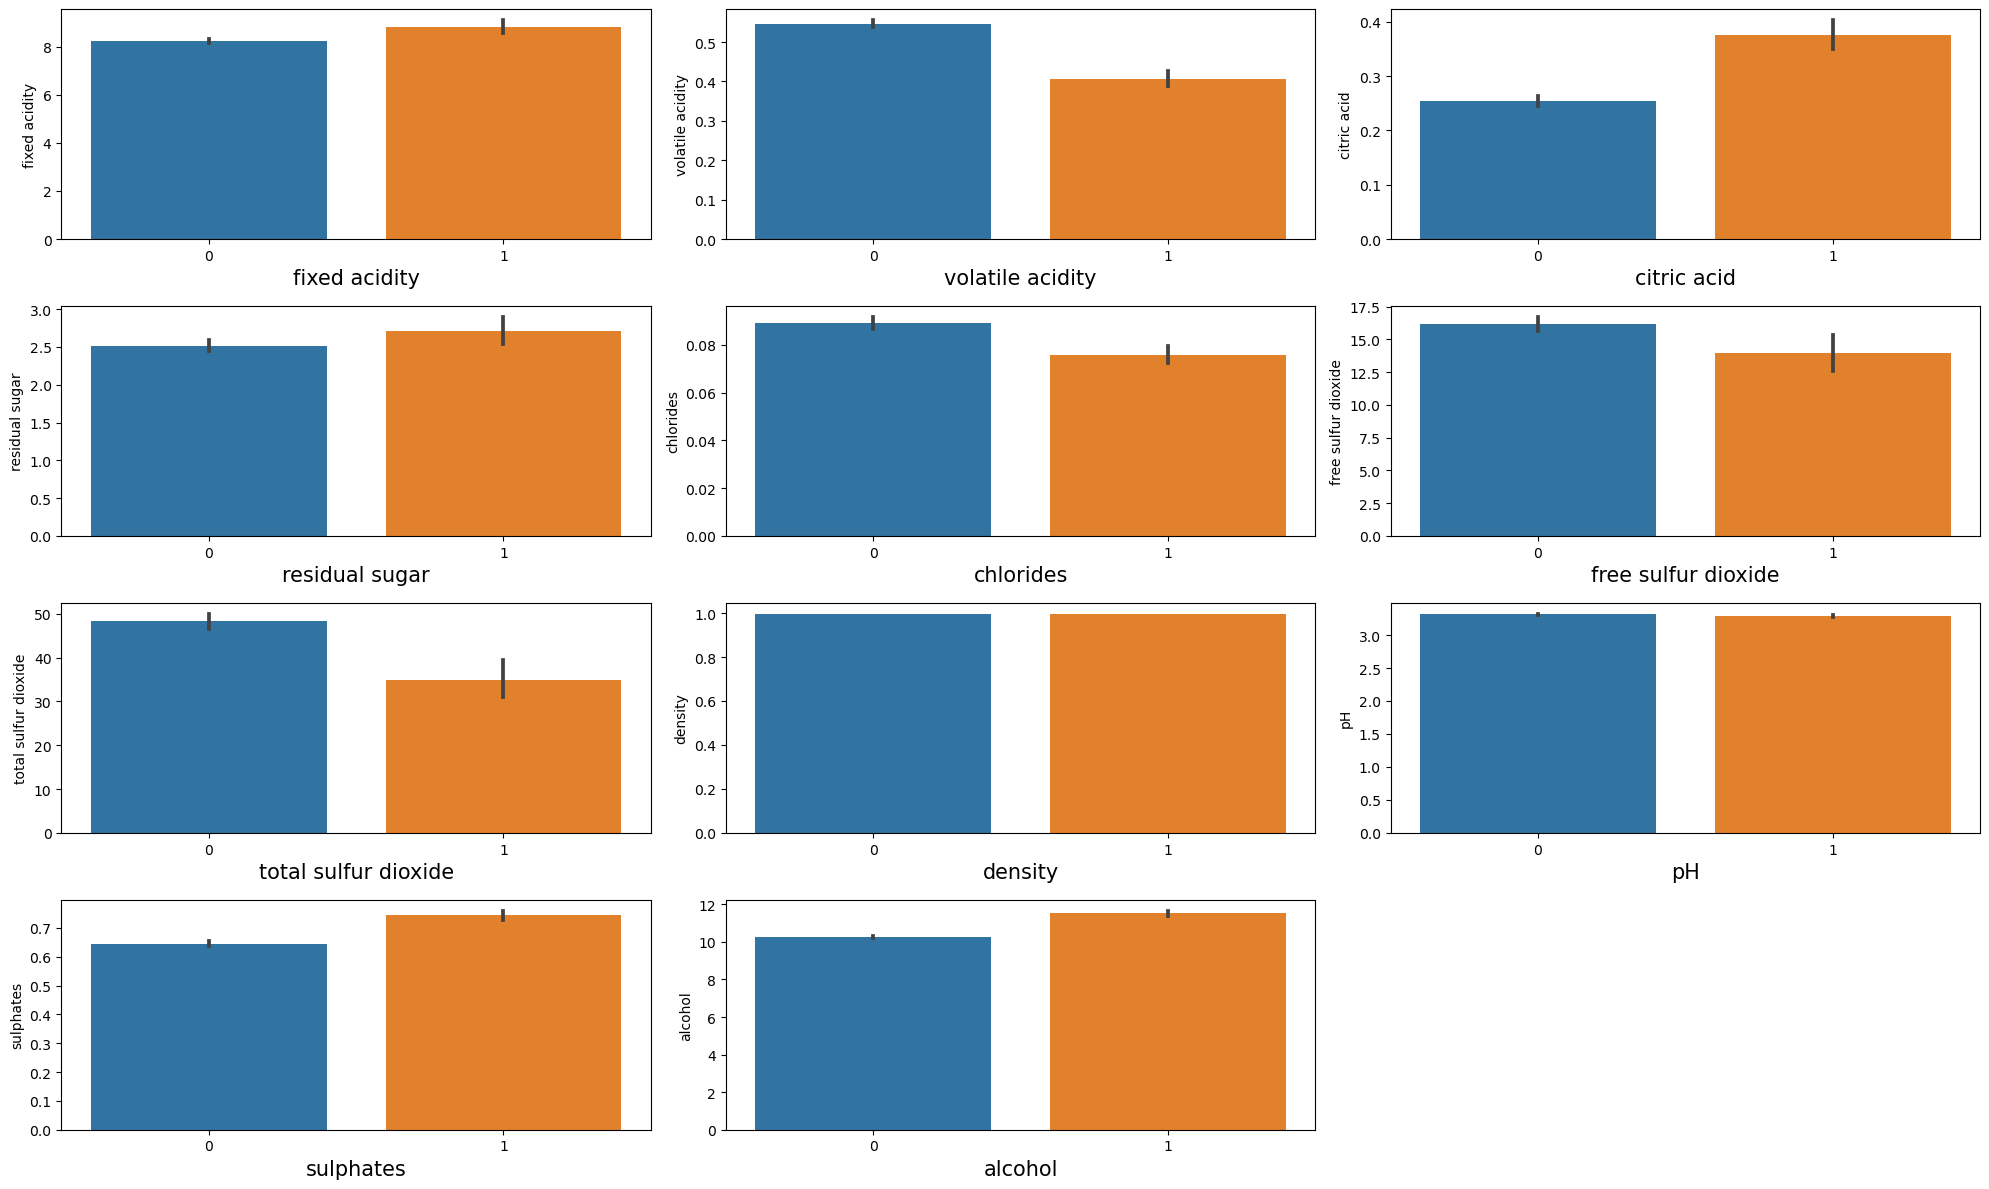

In [115]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.barplot(x='class', y= df[col],data=df)
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Multi Variate Analysis


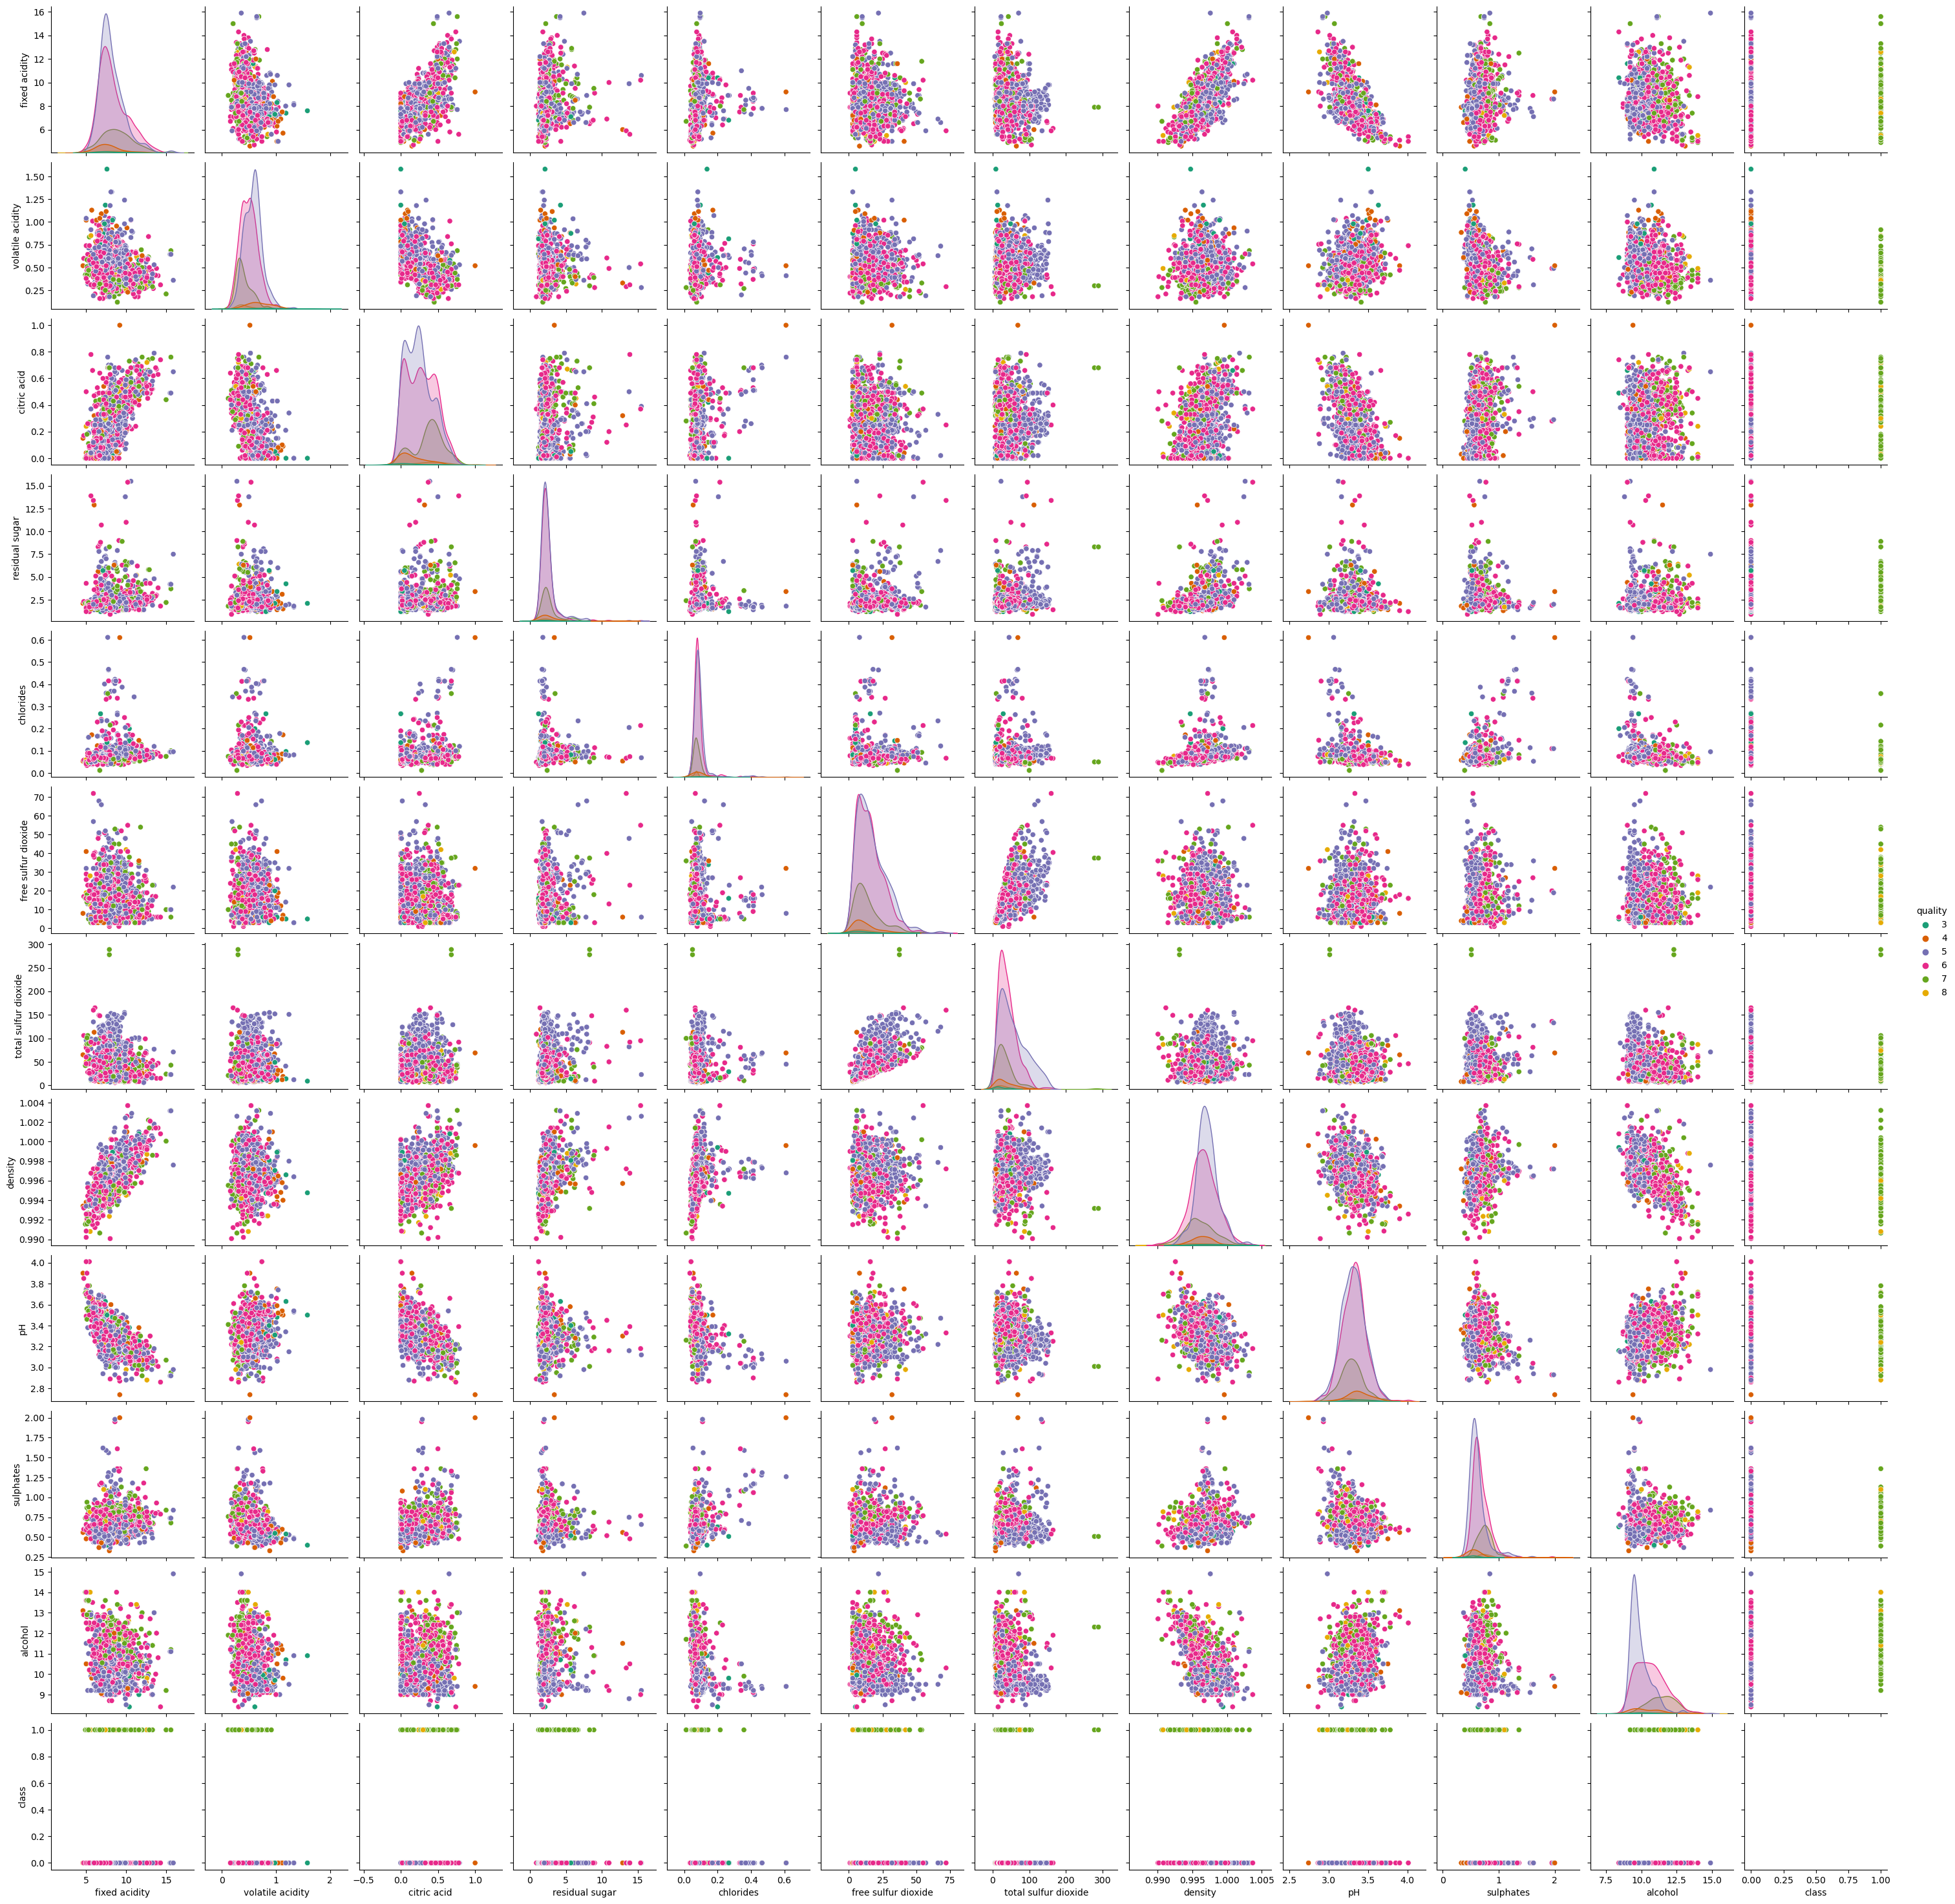

In [87]:
sns.pairplot(df,hue='quality', palette='Dark2')
plt.show()

# Checking for Outliers

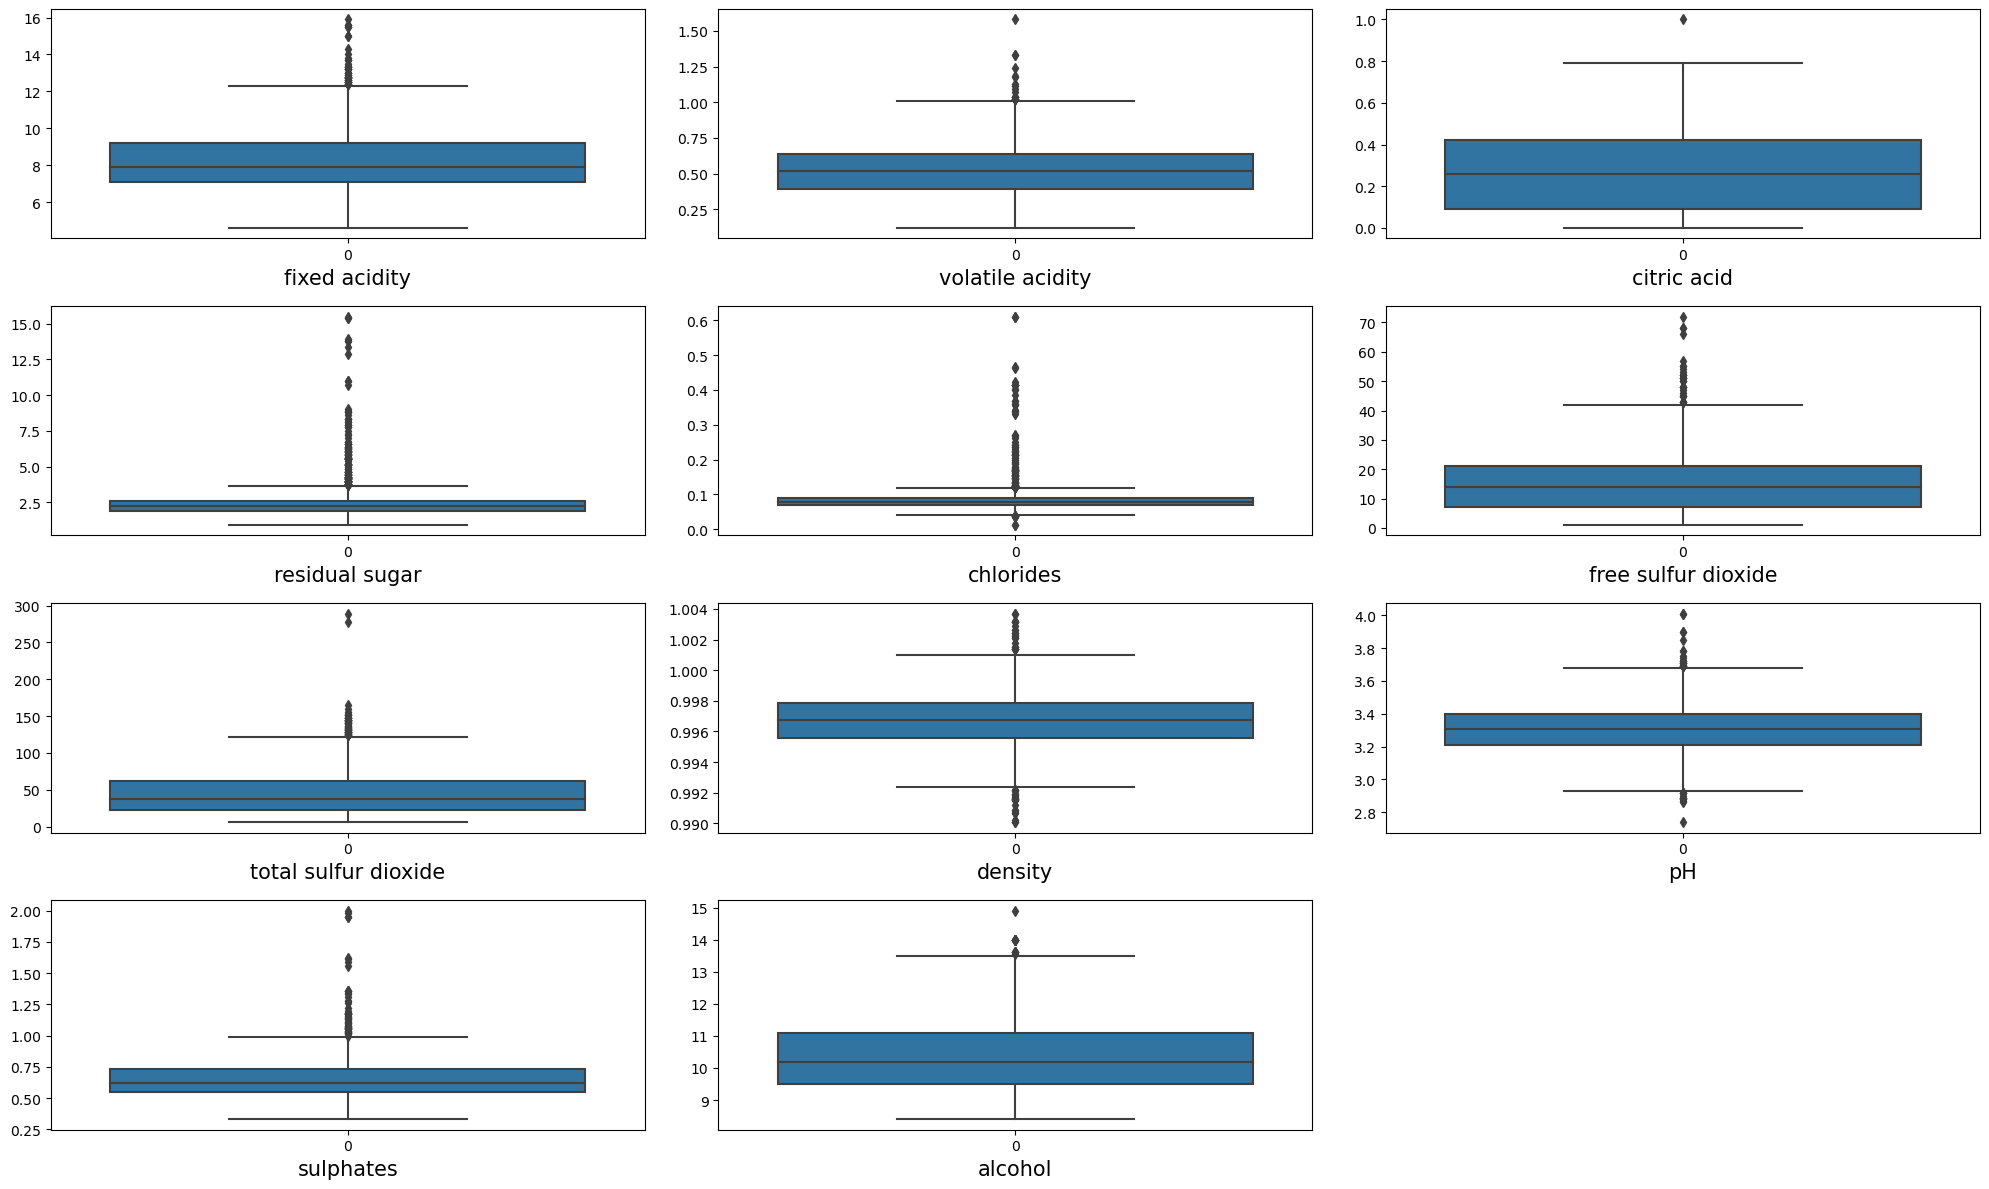

In [88]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we can see there are outliers in data we will handle it

In [117]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data

filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3

df= df[filtering_entry]

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1451.000000       1451.000000  1451.000000     1451.000000   
mean        8.310062          0.522950     0.265382        2.387285   
std         1.646458          0.168531     0.190934        0.862078   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1451.000000          1451.000000           1451.000000  1451.000000   
mean      0.081425            15.104755             43.735355     0.996710   
std       0.020966             9.309768             29.441284     0.001716   
min       0.038000             1.000000              6.000000     0.991500   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             36.000000     0.996700   
75%       0.089000            21.000000             58.000000     0.997800   
max       0.226000            47.000000            145.000000     1.002200   

                pH    sulphates      alcohol      quality        class  
count  1451.000000  1451.000000  1451.000000  1451.000000  1451.000000  
mean      3.315934     0.642584    10.421089     5.659545     0.138525  
std       0.141096     0.129801     1.021588     0.781605     0.345569  
min       2.880000     0.330000     8.500000     4.000000     0.000000  
25%       3.220000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     0.000000  
75%       3.400000     0.720000    11.100000     6.000000     0.000000  
max       3.750000     1.160000    13.600000     8.000000     1.000000

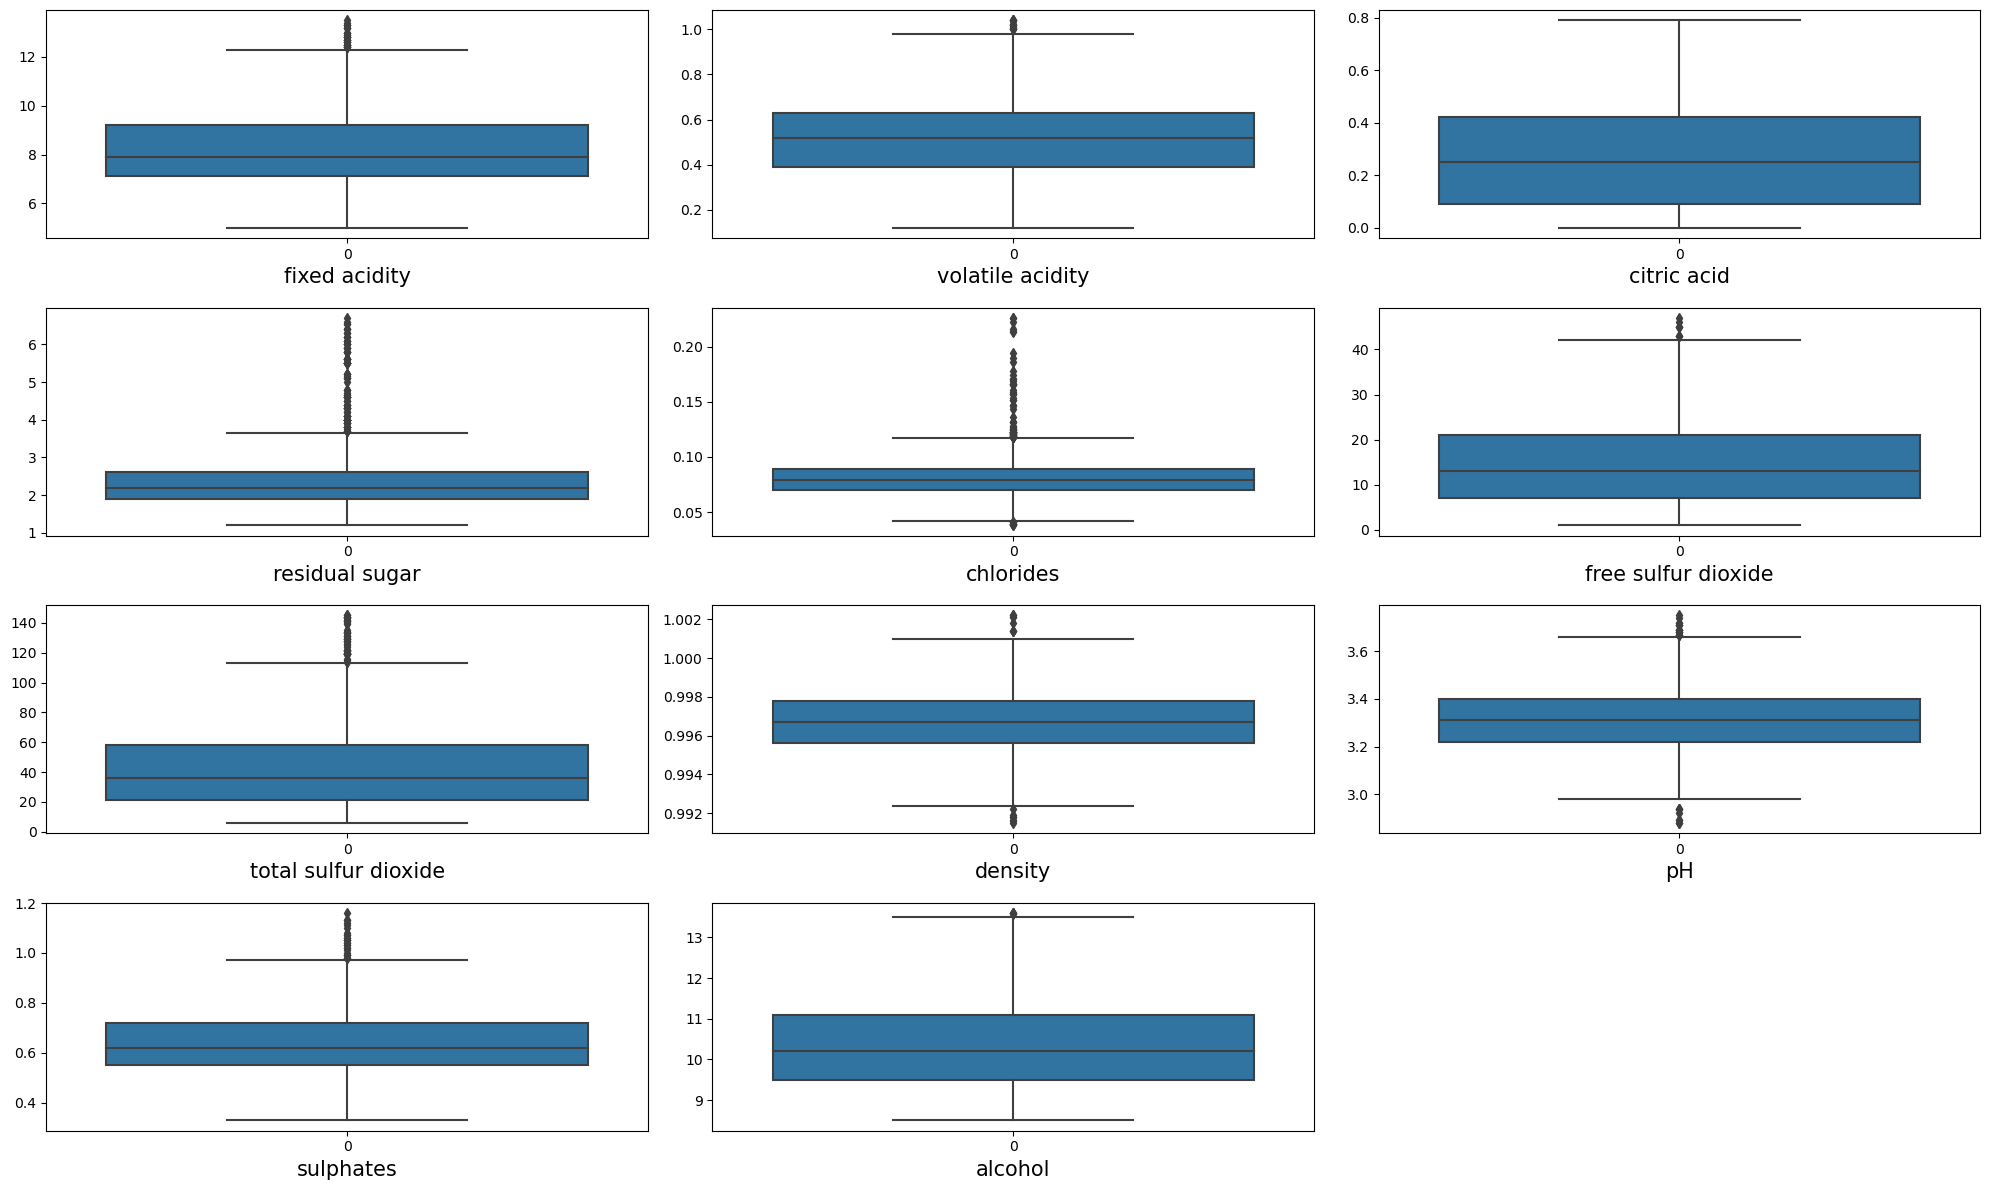

In [118]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we can clearly see differnce before removing outlier and after

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
 11  quality               1451 non-null   int64  
 12  class                 1451 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 191.0 KB


In [121]:
cor= df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.297150     0.698363   
volatile acidity          -0.297150          1.000000    -0.589452   
citric acid                0.698363         -0.589452     1.000000   
residual sugar             0.180293          0.025977     0.184960   
chlorides                  0.183549          0.072709     0.100361   
free sulfur dioxide       -0.148815          0.013943    -0.074441   
total sulfur dioxide      -0.099928          0.110338     0.005301   
density                    0.659927         -0.004957     0.371729   
pH                        -0.705572          0.251343    -0.520311   
sulphates                  0.200371         -0.348126     0.302815   
alcohol                   -0.015114         -0.213213     0.168766   
quality                    0.145163         -0.353443     0.243999   
class                      0.125791         -0.267836     0.227633   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.180293   0.183549            -0.148815   
volatile acidity            0.025977   0.072709             0.013943   
citric acid                 0.184960   0.100361            -0.074441   
residual sugar              1.000000   0.126735            -0.000844   
chlorides                   0.126735   1.000000            -0.058163   
free sulfur dioxide        -0.000844  -0.058163             1.000000   
total sulfur dioxide        0.095093   0.045025             0.660188   
density                     0.344801   0.328695            -0.037630   
pH                         -0.075140  -0.182841             0.108831   
sulphates                   0.076129   0.022107             0.055956   
alcohol                     0.162533  -0.205414            -0.077993   
quality                     0.061482  -0.108787            -0.071202   
class                       0.117036  -0.112080            -0.086402   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.099928  0.659927 -0.705572   0.200371   
volatile acidity                  0.110338 -0.004957  0.251343  -0.348126   
citric acid                       0.005301  0.371729 -0.520311   0.302815   
residual sugar                    0.095093  0.344801 -0.075140   0.076129   
chlorides                         0.045025  0.328695 -0.182841   0.022107   
free sulfur dioxide               0.660188 -0.037630  0.108831   0.055956   
total sulfur dioxide              1.000000  0.118965 -0.005940  -0.039024   
density                           0.118965  1.000000 -0.312310   0.129896   
pH                               -0.005940 -0.312310  1.000000  -0.039082   
sulphates                        -0.039024  0.129896 -0.039082   1.000000   
alcohol                          -0.259952 -0.468312  0.135624   0.241636   
quality                          -0.237745 -0.167568 -0.082164   0.386567   
class                            -0.172638 -0.153031 -0.079105   0.310432   

                       alcohol   quality     class  
fixed acidity        -0.015114  0.145163  0.125791  
volatile acidity     -0.213213 -0.353443 -0.267836  
citric acid           0.168766  0.243999  0.227633  
residual sugar        0.162533  0.061482  0.117036  
chlorides            -0.205414 -0.108787 -0.112080  
free sulfur dioxide  -0.077993 -0.071202 -0.086402  
total sulfur dioxide -0.259952 -0.237745 -0.172638  
density              -0.468312 -0.167568 -0.153031  
pH                    0.135624 -0.082164 -0.079105  
sulphates             0.241636  0.386567  0.310432  
alcohol               1.000000  0.501501  0.430906  
quality               0.501501  1.000000  0.728804  
class                 0.430906  0.728804  1.000000

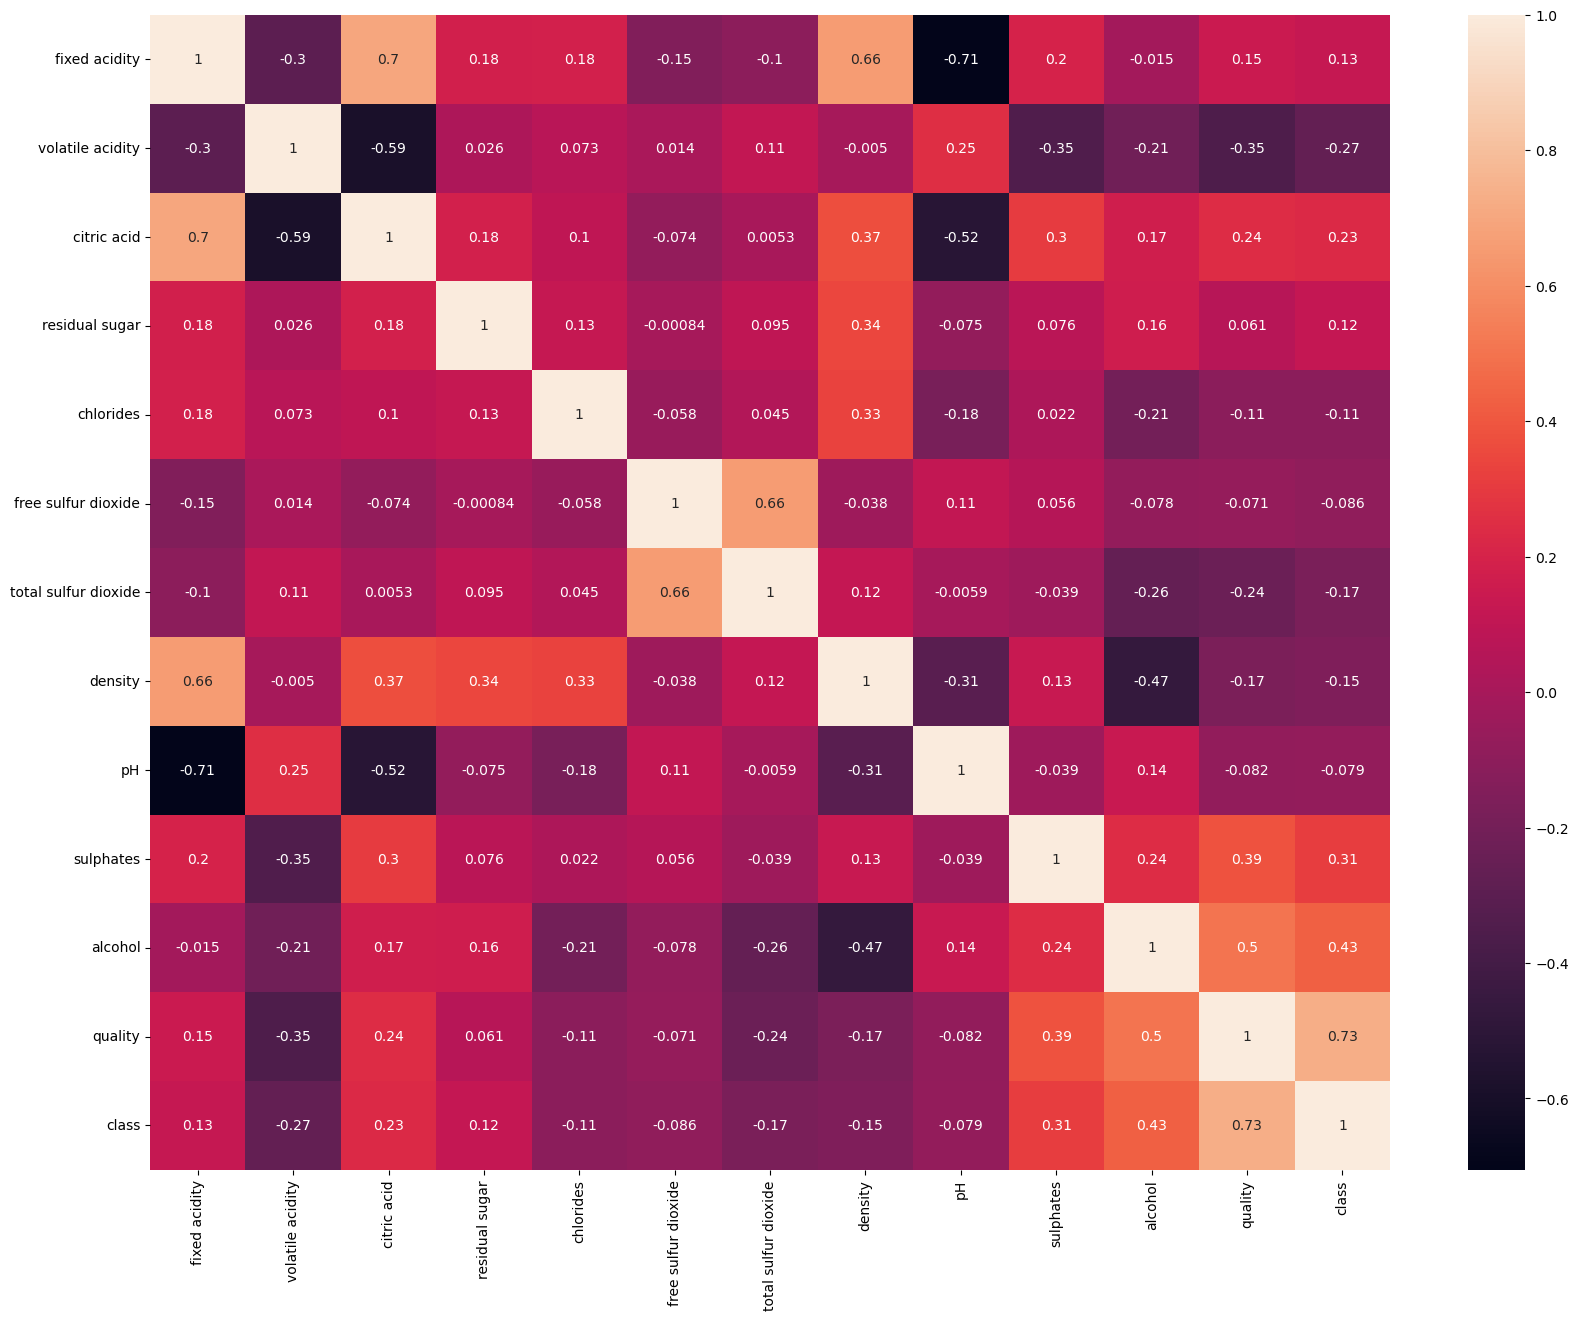

In [129]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0);
plt.show()

As we can see there are not much corelation betweeb label and features but there is corelation between features let's explore ot more
such as PH, density with fixed acidity, citric acid with volatile acid

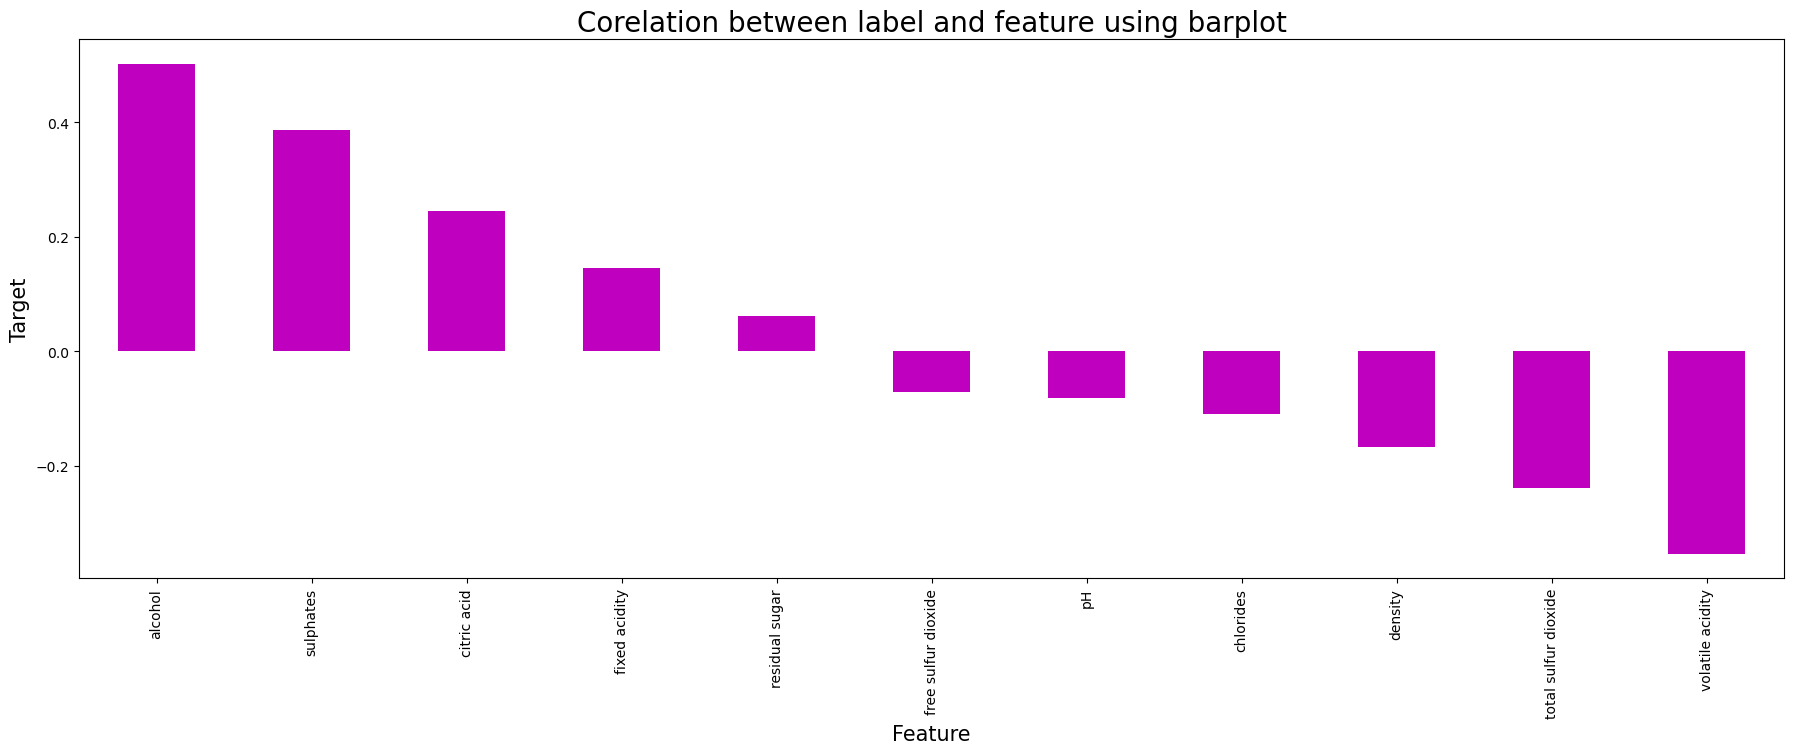

In [131]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality', 'class']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [133]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
class                   0.728804
alcohol                 0.501501
sulphates               0.386567
citric acid             0.243999
fixed acidity           0.145163
residual sugar          0.061482
free sulfur dioxide    -0.071202
pH                     -0.082164
chlorides              -0.108787
density                -0.167568
total sulfur dioxide   -0.237745
volatile acidity       -0.353443
Name: quality, dtype: float64

In [136]:
df= df.drop('quality', axis=1)

**Separating features and label** 

In [138]:
x= df.drop('class', axis=1)
y= df["class"]

**Feature Scaling using Standard Scalarization**

In [139]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
1         -0.309900          2.119336    -1.390400        0.246832   0.790825   
2         -0.309900          1.407054    -1.180831       -0.101284   0.504550   
3          1.755851         -1.442071     1.543569       -0.565439  -0.306564   
4         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
...             ...               ...          ...             ...        ...   
1446      -1.282019          0.457346    -0.971261       -0.449401   0.409125   
1447      -1.464291          0.160562    -0.866477       -0.217323  -0.926828   
1448      -1.221261         -0.076865    -0.709300       -0.101284  -0.258851   
1449      -1.464291          0.724451    -0.761692       -0.449401  -0.306564   
1450      -1.403533         -1.264001     1.072038        1.407221  -0.688265   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.441060             -0.330784  0.635485  1.375896   
1                1.063255              0.790477  0.052390 -0.821951   
2               -0.011256              0.348768  0.169009 -0.396561   
3                0.203646              0.552634  0.752103 -1.105544   
4               -0.441060             -0.330784  0.635485  1.375896   
...                   ...                   ...       ...       ...   
1446             1.815413              0.008992 -1.055489  0.950506   
1447             2.567570              0.246835 -0.927209  1.446794   
1448             1.493059             -0.126918 -0.565690  0.737811   
1449             1.815413              0.008992 -0.723125  1.801286   
1450             0.311097             -0.058963 -0.711464  0.525116   

      sulphates   alcohol  
0     -0.636458 -0.999856  
1      0.288353 -0.608174  
2      0.057150 -0.608174  
3     -0.482323 -0.608174  
4     -0.636458 -0.999856  
...         ...       ...  
1446  -0.482323  0.077270  
1447   0.904894  0.762714  
1448   0.827826  0.566873  
1449   0.519556 -0.216491  
1450   0.134218  0.566873  

[1451 rows x 11 columns]

As there was multi colinearity so let's check Vif values

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values              Features
0     7.942437         fixed acidity
1     1.861970      volatile acidity
2     3.191798           citric acid
3     1.653039        residual sugar
4     1.171792             chlorides
5     1.933500   free sulfur dioxide
6     2.185633  total sulfur dioxide
7     6.418063               density
8     3.214298                    pH
9     1.309630             sulphates
10    3.243686               alcohol

In [143]:
x.drop("fixed acidity", axis=1, inplace=True)

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values              Features
0    1.857006      volatile acidity
1    2.846734           citric acid
2    1.427343        residual sugar
3    1.150627             chlorides
4    1.920014   free sulfur dioxide
5    2.089162  total sulfur dioxide
6    2.597864               density
7    1.518750                    pH
8    1.298347             sulphates
9    2.309491               alcohol

So we have solved multicolinearity issue now we can move ahead to build model

In [147]:
y.value_counts()

class
0    1250
1     201
Name: count, dtype: int64

Clas is imbalance lets handle this now

In [148]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1= SM.fit_resample(x,y)

Applied Smote sampling for balancing data

In [150]:
y1.value_counts()

class
0    1250
1    1250
Name: count, dtype: int64

# Model Building 

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1, test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS=i
print("Best Accuracy is ", maxAccu,"at random state", maxRS)

Best Accuracy is  0.9666666666666667 at random state 123


**Logistic Regression**

In [153]:
 x_train, x_test, y_train, y_test= train_test_split(x1,y1, test_size=0.30, random_state=maxRS)

In [156]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

**Logistic Rgression**

In [157]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8186666666666667
[[297  72]
 [ 64 317]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       369
           1       0.81      0.83      0.82       381

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750



In [158]:
RF= ()
RF.fit(x_train, y_train)
predRF= RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.9626666666666667
[[346  23]
 [  5 376]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       369
           1       0.94      0.99      0.96       381

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



**GradientBoostingClassifier**

In [159]:
GB= GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9106666666666666
[[325  44]
 [ 23 358]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       369
           1       0.89      0.94      0.91       381

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



**AdaBoost**

In [160]:
AB= AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB= AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.84
[[300  69]
 [ 51 330]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       369
           1       0.83      0.87      0.85       381

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750



**Extra Tree Classifier**

In [189]:
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9746666666666667
[[353  16]
 [  3 378]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       369
           1       0.96      0.99      0.98       381

    accuracy                           0.97       750
   macro avg       0.98      0.97      0.97       750
weighted avg       0.98      0.97      0.97       750



To check the model is overift or not let validate by cross validation

**Cross Validation Score**

In [165]:
from sklearn.model_selection import cross_val_score

cv=5 it is fold 5 value
cross_val_score(modelname, feature, label, cv=foldvalue, scoring = accuracy)

In classification algorithm default score parameter is accuracy
for regression default parameter is r2 score


In [168]:
#Checking for cross validation score for Random Forest
score= cross_val_score(RF, x1,y1)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predRF)-score.mean())


[0.964 0.89  0.958 0.888 0.91 ]
<built-in method mean of numpy.ndarray object at 0x12ef9bc90>
Difference between Accuracy score and Cross validation score 0.04066666666666663


In [169]:
#Checking for cross validation score for Logistic Regression
score= cross_val_score(LR, x1,y1)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predLR)-score.mean())


[0.884 0.808 0.832 0.71  0.798]
<built-in method mean of numpy.ndarray object at 0x12ef9b750>
Difference between Accuracy score and Cross validation score 0.012266666666666648


In [170]:
#Checking for cross validation score for Gradient Boosting
score= cross_val_score(GB, x1,y1)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predGB)-score.mean())


[0.884 0.872 0.914 0.83  0.874]
<built-in method mean of numpy.ndarray object at 0x134ac19b0>
Difference between Accuracy score and Cross validation score 0.03586666666666671


In [171]:
#Checking for cross validation score for Ada Boost
score= cross_val_score(AB, x1,y1)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predAB)-score.mean())


[0.87  0.842 0.886 0.764 0.84 ]
<built-in method mean of numpy.ndarray object at 0x134dc1890>
Difference between Accuracy score and Cross validation score -0.00040000000000006697


In [173]:
# Checking for cross validation score for Extra tree
score= cross_val_score(ET, x1,y1)
print(score)
print(score.mean)
print('Difference between Accuracy score and Cross validation score', accuracy_score(y_test, predET)-score.mean())


[0.978 0.902 0.968 0.888 0.932]
<built-in method mean of numpy.ndarray object at 0x1324886f0>
Difference between Accuracy score and Cross validation score 0.0397333333333334


As we see Extra tree give us high accuracy we will consider Extra tree for tunning

# Hyper Paramter Tunning

In [213]:
#Extra tree classifier
from sklearn.model_selection import GridSearchCV

parameters= {'criterion':['gini', 'entropy'],
              'random_state':[10,50,1000],
             'max_depth':[0, 10, 20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [214]:
GCV= GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [215]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [216]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [217]:
Final_model=ExtraTreesClassifier(criterion = 'gini' , max_depth = 20, n_estimators= 300,n_jobs= -2,random_state= 50)
Final_model.fit(x_train, y_train)
pred= Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)


97.46666666666667


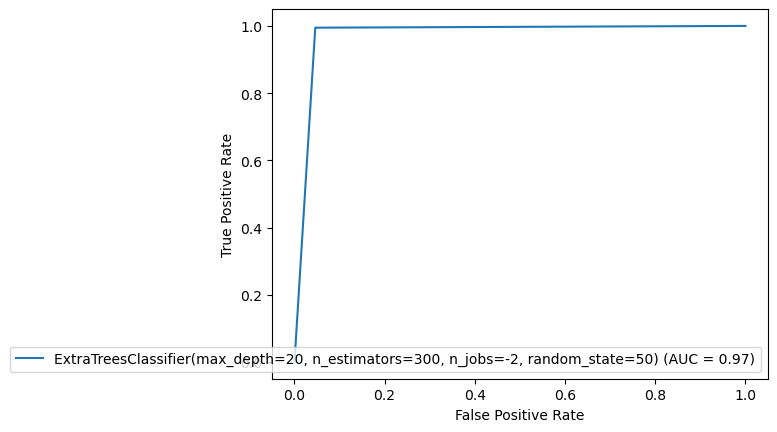

In [218]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc=roc_auc, estimator_name= Final_model)
display.plot()